In [2]:
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError
)
from pdf2image import convert_from_path, convert_from_bytes

from PIL import Image 
import os

In [3]:
from glob import glob
pdfs = glob('docs/*.pdf')

images = []
for pdf in pdfs:
    imgs = convert_from_path(pdf)
    images.append(imgs)

In [9]:
images_path = []

j=0
for p, imgs in enumerate(images):
    i=0
    base = 'images/doc'+str(j)+ '_'+ pdfs[p].replace('.pdf','').replace('docs/','') +'/'
    if not os.path.isfile(base):
        os.mkdir(base)
    for img in imgs:
        img.save(base+str(i)+'.jpg')
        images_path.append(base+str(i)+'.jpg')
        i+=1
    j+=1

In [7]:
pdfs[1]

'docs/52.831_OR.pdf'

In [52]:
import pytesseract
import matplotlib.pyplot as plt
import numpy as np

from pytesseract import Output

In [101]:
# index = 4
# img = Image.open(images_path[index])
img = Image.open('images/1.jpg')
np_img = np.asarray(img)

## Crop 1/3
# np_img_crop = np_img[0:np_img.shape[0]//3,:]

data = pytesseract.image_to_data(np_img, output_type=Output.DICT)

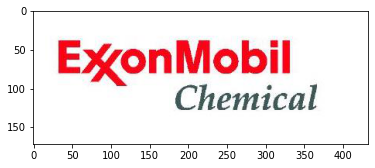

In [102]:
plt.imshow(np_img)

In [103]:
data.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

In [104]:
data['text']

['', '', '', '', 'ExonMobil', '', '', '', 'Chemical']

In [75]:
for i in range(len(data['text'])):
    if 'invoice' in data['text'][i].lower():
        print(i)

40
42


In [77]:
txt = ' '.join(data['text'])

In [90]:
def clean_txt(x):
    keywords = ['',' ']
    if x in keywords:
        return False
    else:
        return True
    
filtered_txt = filter(clean_txt, data['text'])

In [91]:
filtered_txt = ' '.join([i for i in filtered_txt])

In [92]:
filtered_txt

'SOLD TO: URVASHI PULP &PAPER MILLS PVT LTD 315/316-1, G.I.D.C. IND. EST., PB NO. 7, ie ANKLESHWAR 393002, DIST BHARUCH. WASTE MANAGEMENT Recycle COMMERCIAL INVOICE WMRA INVOICE NUMBER: 21529V-01 DESCRIPTION OF GOODS AND/OR SERVICES WASTE PAPER - FIBRE CORES CIE HAZIRA INDIA'

In [87]:
for i in filtered_txt:
    print(i)

In [112]:
csv_file = 'images/via_export_csv.csv'